<a id = 'title'></a>
# Random Forest Classifier Modeling

##### Author: Quinci Birker

## Table of Contents

---------------------------------------
1. [Import Dataset and Libraries](#import)
2. [Baseline Modeling - Logistic Regression](#base)
3. [Baseline Modeling - Decision Tree](#DTC)
4. [Random Forest Classifier](#RFC)
5. [Summary & Insights](#summary)
---------------------------------------

<a id = 'import'></a>
## Import Dataset and Libraries

In [17]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [18]:
# Read in the training dataset
X_train = pd.read_csv('data/X_train_df_final.csv', index_col=0)
y_train = pd.read_csv('data/y_train.csv', index_col=0)

# Read in the testing dataset
X_test = pd.read_csv('data/X_test_df_final.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0)

##### Sanity check training dataset

In [19]:
X_train.head()

,pages,numRatings,bbeScore,year,month,series_bool,genre_count,Adult,Adventure,Audiobook,...,Other,Paranormal,Romance,Science Fiction,Science Fiction Fantasy,Supernatural,Suspense,Thriller,Urban Fantasy,Young Adult
35783,22.0,666,89,1974,1,0,52,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39773,176.0,161,83,1983,1,0,95,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51074,339.0,2535,24,2014,5,1,171,0,0,0,...,1,0,1,0,0,0,0,0,0,1
7233,201.0,17367,370,2009,7,0,139,0,0,0,...,1,0,0,1,0,0,0,0,0,0
6868,224.0,94434,389,2016,11,0,125,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [20]:
X_train.shape

(33041, 38)

In [21]:
y_train.head()

,rating
35783,1
39773,0
51074,0
7233,1
6868,0


In [22]:
y_train.shape

(33041, 1)

Scikit-Learn models generally expect the target variable to be a 1D array, so this will need to be reshaped

In [23]:
# Reshape y_train
y_train = y_train.values.ravel()
y_train.shape

(33041,)

##### Sanity check testing dataset

In [24]:
X_test.head()

,pages,numRatings,bbeScore,year,month,series_bool,genre_count,Adult,Adventure,Audiobook,...,Other,Paranormal,Romance,Science Fiction,Science Fiction Fantasy,Supernatural,Suspense,Thriller,Urban Fantasy,Young Adult
33489,346.0,1864,92,2015,9,1,147,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12086,160.0,12646,194,2002,1,1,140,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8714,513.0,62049,289,2019,9,1,131,0,0,0,...,1,0,0,0,0,0,0,0,0,0
36527,432.0,3347,88,2012,3,0,127,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12745,345.0,115,190,2014,6,1,65,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
X_test.shape

(8261, 38)

In [26]:
y_test.head()

,rating
33489,1
12086,0
8714,1
36527,1
12745,0


In [27]:
y_test.shape

(8261, 1)

In [28]:
# Reshape the y_test
y_test = y_test.values.ravel()
y_test.shape

(8261,)

<a id = 'base'></a>
## Baseline Modeling

The baseline will be a logistic regression model. This will be used for future testing in how other models perform.

The model will predict whether a book has a good rating (1) or a bad rating (0).<a id = 'base_model'></a>


##### Scale the data

Since the majority of columns are binary, only the non-binary columns will be scaled. 
First, seperate the binary from non-binary columns and then apply the standard scaler to only the non-binary columns. 

In [29]:
# Identify non-binary columns
# non_binary_cols = [col for col in X_train_df_final.columns if len(X_train_df_final[col].unique()) > 2]
non_binary_cols = ['pages', 'numRatings', 'bbeScore', 'year', 'month']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale only non-binary columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[non_binary_cols] = scaler.fit_transform(X_train[non_binary_cols])
X_test_scaled[non_binary_cols] = scaler.transform(X_test[non_binary_cols])

In [30]:
# Instantiate and fit logisitc regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Train and test scores
print(f'Train score: {logreg.score(X_train_scaled, y_train)}')
print(f'Test score: {logreg.score(X_test_scaled, y_test)}')

Train score: 0.6415665385430223
Test score: 0.517491829076383


/Users/quincibirker/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test_scaled)

The baseline logisitc regression has a train score of 64 percent and a test score of 52 percent. There seems to be overfitting and the overall test accuracy is not strong. This will still be used as a baseline and hopefully testing out different models will improve the prediction accuracy for the test set.

In [32]:
# Extract the coefficients
coefficients = logreg.coef_[0]

# Calculate the odds ratios
odds_ratio = np.exp(coefficients)

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame with feature names and their corresponding coefficients and odds ratios
feature_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_ratio': odds_ratio
})

# Sort the coefficients from highest to lowest
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Display 
feature_coefficients

,Feature,Coefficient,Odds_ratio
5,series_bool,0.833176,2.300613
0,pages,0.489714,1.631849
11,Childrens,0.449391,1.567357
12,Classics,0.398184,1.489119
14,Contemporary Romance,0.301780,1.352264
34,Suspense,0.192391,1.212144
28,Other,0.185002,1.203220
1,numRatings,0.137388,1.147273
3,year,0.103011,1.108504
26,Nonfiction,0.057649,1.059343


Highest odds ratio:
- The series columns has the highest coefficient of around 0.83. If the book is in a series, it has 2.3 times better odds to have a good review than if it's not in a series.
- From the genres columns, Childrens, Classocs and Contemporary Romance have the highest odds ratios.

Lowest odds ratio:
- From the genres columns, Chick Lit has the highest negative correlation of around -0.71 and Mystery being second with around -0.62

Notes:
- In future, the genres could be filtered through a bit more. For example, in the top 30 genres, there is Historical, Historical Fiction, and History. These could be put into a single category to allow for other genres.

##### Confusion Matrix

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.46      0.03      0.05      3968
           1       0.52      0.97      0.68      4293

    accuracy                           0.52      8261
   macro avg       0.49      0.50      0.36      8261
weighted avg       0.49      0.52      0.37      8261



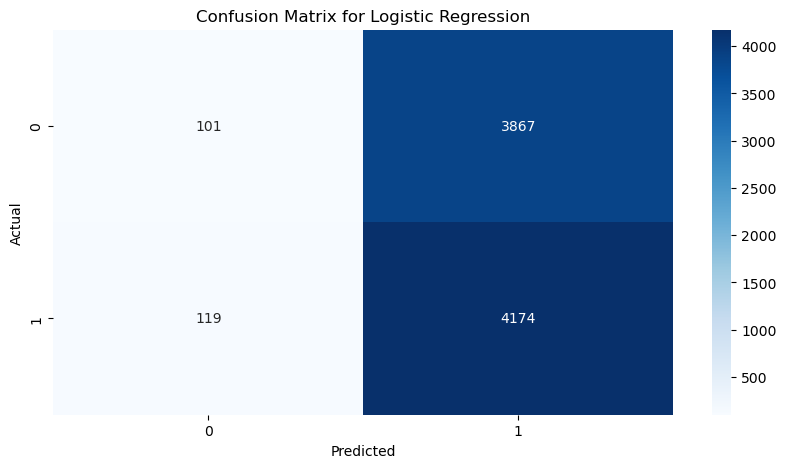

In [33]:
# Classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Generate the confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Confusion matrix heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Model Summary

|    | Model Type          | Train Accuracy | Test Accuracy | Parameters | Notes    |
|----|---------------------|----------------|---------------|------------|----------|
| 1. | Logistic Regression | 62 %           | 52 %          | None       | Baseline |

<a id = 'DTC'></a>
## Decision Tree Classifier

##### Baseline DTC Model

In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print(f'Train score: {dtc.score(X_train, y_train)}')
print(f'Test score: {dtc.score(X_test, y_test)}')

Train score: 1.0
Test score: 0.5298390025420652


The baseline model is over fitting a lot, with a gap of almost 50 percent. The next step is to use hyper parameters to see if we can obtain a better test score.

##### Model Summary

|    | Model Type               | Train Accuracy | Test Accuracy | Parameters | Notes    |
|----|--------------------------|----------------|---------------|------------|----------|
| 1. | Logistic Regression      | 62 %           | 52 %          | None       | Baseline |
| 2. | Decision Tree Classifier | 100 %          | 53 %          | None       | Baseline |

<a id = 'RFC'></a>
## Random Forest Classifier

##### Random Search

To efficiently tune hyperparameters, I'll start with a random search to quickly explore a wide range of options. Then, using the insights gained, I'll conduct a more targeted grid search in a narrowed range. This approach combines the speed of random search with the thoroughness of grid search for better results.

In [49]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=55)

# Define the parameter space
param_distributions = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,7),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

# Set up the random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_distributions, 
                                   n_iter=50, cv=5, verbose=2, random_state=55)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=260; total time=   2.3s
[CV] END criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=260; total time=   2.3s
[CV] END criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=260; total time=   2.3s
[CV] END criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=260; total time=   2.3s
[CV] END criterion=entropy, max_depth=80, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=260; total time=   2.4s
[CV] END criterion=entropy, max_depth=60, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=60, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total t

[CV] END criterion=gini, max_depth=40, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.9s
[CV] END criterion=gini, max_depth=40, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.9s
[CV] END criterion=gini, max_depth=40, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.9s
[CV] END criterion=gini, max_depth=40, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.9s
[CV] END criterion=gini, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   1.3s
[CV] END criterion=gini, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   1.3s
[CV] END criterion=gini, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=160; total time=   1.3s
[CV] END criterion=gini, max_depth=30, max_features=1, min_samples_leaf=2

[CV] END criterion=entropy, max_depth=50, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=50, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.3s
[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.3s
[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.3s
[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.3s
[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.2s
[CV] END criterion=entropy, max_depth=50, max_feat

[CV] END criterion=gini, max_depth=50, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   1.2s
[CV] END criterion=gini, max_depth=50, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   1.2s
[CV] END criterion=gini, max_depth=50, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   1.2s
[CV] END criterion=gini, max_depth=50, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   1.2s
[CV] END criterion=gini, max_depth=50, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   1.2s
[CV] END criterion=entropy, max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=160; total time=   2.7s
[CV] END criterion=entropy, max_depth=30, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=160; total time=   2.7s
[CV] END criterion=entropy, max_depth=30, max_features=3, min_sample

[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.3s
[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.3s
[CV] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=310; total time=   7.3s
Best parameters found:  {'criterion': 'entropy', 'max_depth': 80, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 310}


Best parameters found:  {'criterion': 'entropy', 'max_depth': 80, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 310}

##### Check model accuracy with the best parameters

In [53]:
accuracy = best_rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5236654158092241


##### Perform a grid search

In [28]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=55)

# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],  # No change needed as it's categorical
    'max_depth': [70, 80, 90],
    'max_features': [4, 5, 6],
    'min_samples_split': [3, 4, 5],
    'n_estimators': [290, 310, 330]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score is: "+str(grid_search.best_score_))

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 70, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 290}
Best score is: 0.7135979689813252


Best parameters found:  
- 'criterion': 'entropy'
- 'max_depth': 70
- 'max_features': 5
- 'min_samples_split': 4
- 'n_estimators': 290

##### Random Forest Model with new parameters

In [35]:
params = {
    'criterion': 'entropy',
    'max_depth': 70,  
    'max_features': 5,  
    'min_samples_split': 4,  
    'n_estimators': 290  
}

# Initialize the RandomForestClassifier with these parameters
rf_model = RandomForestClassifier(**params, random_state=55)

# Fit the model to your training data (assuming you have X_train and y_train)
rf_model.fit(X_train, y_train)

# Use rf_model to make predictions 
y_pred = rf_model.predict(X_test)

print(f'Train score: {rf_model.score(X_train, y_train)}')
print(f'Test score: {rf_model.score(X_test, y_test)}')

Train score: 0.9991223025937471
Test score: 0.5235443650889723


##### Classification Report & Confusion Matrix

              precision    recall  f1-score   support

           0       0.71      0.01      0.03      3968
           1       0.52      0.99      0.68      4293

    accuracy                           0.52      8261
   macro avg       0.62      0.50      0.36      8261
weighted avg       0.61      0.52      0.37      8261



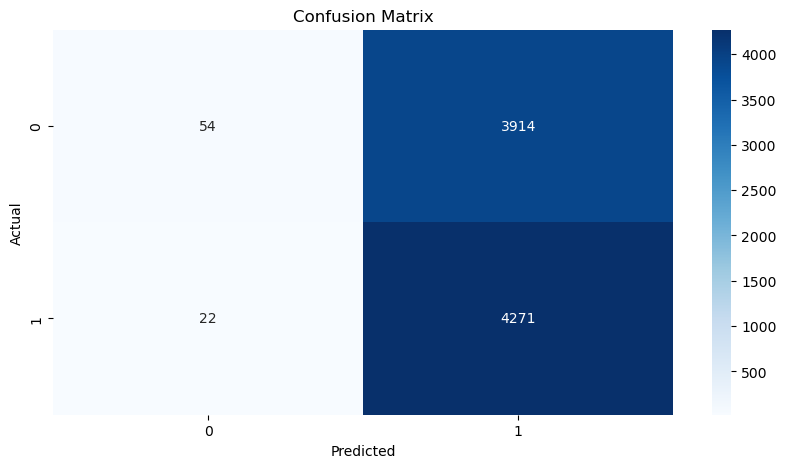

In [36]:
# Classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Feature importance

In [41]:
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.14213935 0.13242361 0.12558194 0.10819597 0.07616188 0.02643049
 0.1122876  0.01272878 0.01087062 0.0132024  0.00824118 0.00958079
 0.01028406 0.01222163 0.00545296 0.00624254 0.01100734 0.01415404
 0.01012358 0.0093543  0.00376903 0.01151264 0.00760693 0.00747006
 0.00623425 0.01207971 0.00509909 0.01321768 0.00375301 0.00804221
 0.01289445 0.00916618 0.00538987 0.00571606 0.00579329 0.00721224
 0.00557982 0.01277842]


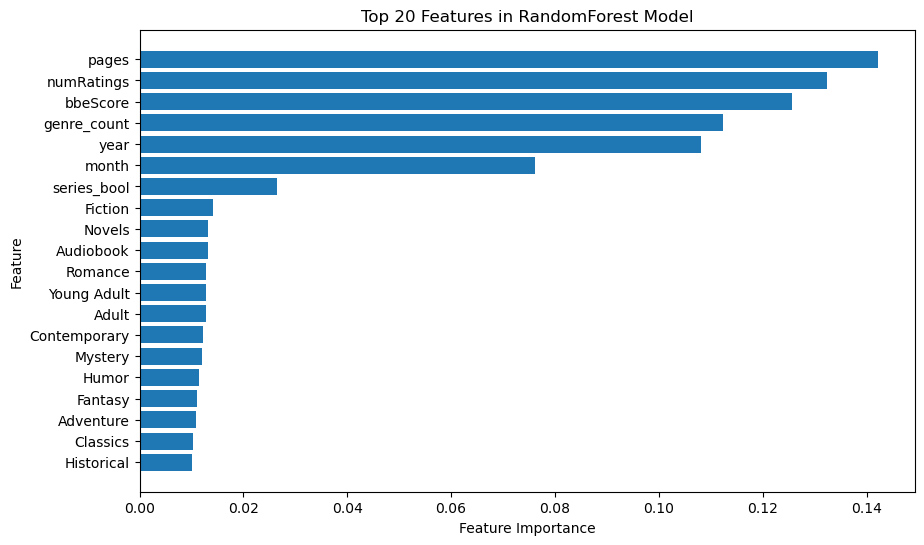

In [42]:
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])

# Sorting the features with their importance
sorted_idx = np.argsort(feature_importances)[-20:]  # Get indices of top 20 features
sorted_importances = feature_importances[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Features in RandomForest Model")
plt.show()

<a id = 'summary'></a>
## Summary & Insights


[Back to the top](#title)